In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import awkward as ak
import pandas as pd
import pylhe
from tqdm import tqdm
import itertools

In [2]:
print(ak.__version__)
print(uproot.__version__)

1.7.0
4.1.7


In [3]:
# import the root file
f_Att = uproot.open('/workspace/tA_06/Events/run_01/tag_1_delphes_events.root')
f_ttW = uproot.open('/workspace/ttW_06/Events/run_01/tag_1_delphes_events.root')
f_ttZ = uproot.open('/workspace/ttZ_06/Events/run_01/tag_1_delphes_events.root')
f_tZj = uproot.open('/workspace/tZj_06/Events/run_01/tag_1_delphes_events.root')

f_Att.keys()

['ProcessID0;1', 'Delphes;1']

In [4]:
f_Att['Delphes;1'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | int32_t                  | AsDtype('>i4')
Event/Event.fUniq... | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.fBits    | uint8_t[]                | AsJagged(AsDtype('uint8'))
Event/Event.Number   | int64_t[]                | AsJagged(AsDtype('>i8'))
Event/Event.ReadTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.ProcTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Proce... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.MPI      | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Weight   | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Scale    

In [15]:
# Define Trees
tree_particle_Att = f_Att['Delphes;1/Particle']
tree_electron_Att = f_Att['Delphes;1/Electron']
tree_muon_Att = f_Att['Delphes;1/Muon']
tree_jet_Att = f_Att['Delphes;1/Jet']
tree_Emiss_Att = f_Att['Delphes;1/MissingET']
tree_HT_Att = f_Att['Delphes;1/ScalarHT']
tree_fatjet_Att = f_Att['Delphes;1/FatJet']

tree_particle_ttW = f_ttW['Delphes;1/Particle']
tree_electron_ttW = f_ttW['Delphes;1/Electron']
tree_muon_ttW = f_ttW['Delphes;1/Muon']
tree_jet_ttW = f_ttW['Delphes;1/Jet']
tree_Emiss_ttW = f_ttW['Delphes;1/MissingET']
tree_HT_ttW = f_ttW['Delphes;1/ScalarHT']
tree_fatjet_ttW = f_ttW['Delphes;1/FatJet']

tree_particle_ttZ = f_ttZ['Delphes;1/Particle']
tree_electron_ttZ = f_ttZ['Delphes;1/Electron']
tree_muon_ttZ = f_ttZ['Delphes;1/Muon']
tree_jet_ttZ = f_ttZ['Delphes;1/Jet']
tree_Emiss_ttZ = f_ttZ['Delphes;1/MissingET']
tree_HT_ttZ = f_ttZ['Delphes;1/ScalarHT']
tree_fatjet_ttZ = f_ttZ['Delphes;1/FatJet']

tree_particle_tZj = f_tZj['Delphes;1/Particle']
tree_electron_tZj = f_tZj['Delphes;1/Electron']
tree_muon_tZj = f_tZj['Delphes;1/Muon']
tree_jet_tZj = f_tZj['Delphes;1/Jet']
tree_Emiss_tZj = f_tZj['Delphes;1/MissingET']
tree_HT_tZj = f_tZj['Delphes;1/ScalarHT']
tree_fatjet_tZj = f_tZj['Delphes;1/FatJet']

tree_electron_Att.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron             | int32_t                  | AsDtype('>i4')                
Electron.fUniqueID   | uint32_t[]               | AsJagged(AsDtype('>u4'))
Electron.fBits       | uint8_t[]                | AsJagged(AsDtype('uint8'))
Electron.PT          | float[]                  | AsJagged(AsDtype('>f4'))
Electron.Eta         | float[]                  | AsJagged(AsDtype('>f4'))
Electron.Phi         | float[]                  | AsJagged(AsDtype('>f4'))
Electron.T           | float[]                  | AsJagged(AsDtype('>f4'))
Electron.Charge      | int32_t[]                | AsJagged(AsDtype('>i4'))
Electron.EhadOverEem | float[]                  | AsJagged(AsDtype('>f4'))
Electron.Particle    | TRef[]                   | AsJagged(AsStridedObjects(M...
Electron.Isolatio... | float[]                  | AsJagged(AsDtype('>f4'))

In [17]:
Att_particle = tree_particle_Att.arrays(['Particle.PID',
                                         'Particle.Mass',
                                         'Particle.PT'], library='ak')
Att_electron = tree_electron_Att.arrays(['Electron.PT',
                                        'Electron.Eta',
                                        'Electron.Phi',
                                        'Electron.Charge'], library='ak')
Att_muon = tree_muon_Att.arrays(['Muon.PT',
                                'Muon.Eta',
                                'Muon.Phi',
                                'Muon.Charge'], library='ak')
Att_jet = tree_jet_Att.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.BTagPhys',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta',
                               'Jet.DeltaPhi',
                               'Jet.Flavor'], library='np')
Att_Emiss = tree_Emiss_Att.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
Att_HT = tree_HT_Att.arrays(['ScalarHT.HT'], library='ak')
Att_fatjet = tree_fatjet_Att.arrays(['FatJet.PT',
                                     'FatJet.Mass'], library='ak')


ttW_particle = tree_particle_ttW.arrays(['Particle.PID',
                                         'Particle.Mass',
                                         'Particle.PT'])
ttW_electron = tree_electron_ttW.arrays(['Electron.PT',
                                         'Electron.T',
                                        'Electron.Eta',
                                        'Electron.Phi'], library='ak')
ttW_muon = tree_muon_ttW.arrays(['Muon.PT',
                                 'Muon.T',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
ttW_jet = tree_jet_ttW.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta',
                               'Jet.DeltaPhi'], library='np')
ttW_Emiss = tree_Emiss_ttW.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
ttW_HT = tree_HT_ttW.arrays(['ScalarHT.HT'], library='ak')
ttW_fatjet = tree_fatjet_ttW.arrays(['FatJet.PT',
                                     'FatJet.Mass'], library='ak')


ttZ_particle = tree_particle_ttZ.arrays(['Particle.PID', 
                                         'Particle.Mass',
                                         'Particle.PT'])
ttZ_electron = tree_electron_ttZ.arrays(['Electron.PT',
                                         'Electron.T',
                                         'Electron.Eta',
                                         'Electron.Phi'], library='ak')
ttZ_muon = tree_muon_ttZ.arrays(['Muon.PT',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
ttZ_jet = tree_jet_ttZ.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta',
                               'Jet.DeltaPhi'], library='np')
ttZ_Emiss = tree_Emiss_ttZ.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
ttZ_HT = tree_HT_ttZ.arrays(['ScalarHT.HT'], library='ak')
ttZ_fatjet = tree_fatjet_ttZ.arrays(['FatJet.PT',
                                     'FatJet.Mass'], library='ak')


tZj_particle = tree_particle_tZj.arrays(['Particle.PID',
                                         'Particle.Mass',
                                         'Particle.PT'])
tZj_electron = tree_electron_tZj.arrays(['Electron.PT',
                                        'Electron.Eta',
                                        'Electron.Phi'], library='ak')
tZj_muon = tree_muon_tZj.arrays(['Muon.PT',
                                'Muon.Eta',
                                'Muon.Phi'], library='ak')
tZj_jet = tree_jet_tZj.arrays(['Jet.Mass',
                              'Jet.BTag',
                              'Jet.PT',
                              'Jet.Eta', 
                              'Jet.Phi',
                              'Jet.DeltaEta',
                               'Jet.DeltaPhi'], library='np')
tZj_Emiss = tree_Emiss_tZj.arrays(['MissingET.MET',
                                   'MissingET.Phi'], library='ak')
tZj_HT = tree_HT_tZj.arrays(['ScalarHT.HT'], library='ak')
tZj_fatjet = tree_fatjet_tZj.arrays(['FatJet.PT',
                                     'FatJet.Mass'], library='ak')

In [7]:
Att_jet_ak = tree_jet_Att.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')
ttW_jet_ak = tree_jet_ttW.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')
ttZ_jet_ak = tree_jet_ttZ.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')
tZj_jet_ak = tree_jet_tZj.arrays(['Jet.Mass',
                               'Jet.BTag',
                               'Jet.PT',
                               'Jet.Eta', 
                               'Jet.Phi',
                               'Jet.DeltaEta'], library='ak')

In [18]:
print(Att_electron['Electron.PT'], Att_muon['Muon.PT'])
ak.concatenate([Att_electron['Electron.PT'], Att_muon['Muon.PT']], axis=-1)

[[], [], [], [], [41.5], [], [], [], [], ... [], [], [], [135], [], [], [], [], []] [[67.4], [], [68.3], [23.3], [], [], [], ... [], [], [], [], [83.5], [], [], []]


<Array [[67.4], [], [68.3], ... [], [], []] type='10000 * var * float32'>

In [23]:
l1 = ak.Array([[1, 2, 3], [], [4, 5]])
l2 = ak.Array([[1, 2], [3, 4, 5], [5, 6, 7]])
ak.sort(ak.concatenate([l1, l2], axis=-1), axis=-1, ascending=False)

<Array [[3, 2, 2, 1, 1], ... [7, 6, 5, 5, 4]] type='3 * var * int64'>

In [8]:
Att_jet_ak['Jet.PT'], Att_jet_ak['Jet.BTag']

(<Array [[183, 99, 68.4, ... 40.8, 31.7, 28.7]] type='10000 * var * float32'>,
 <Array [[0, 1, 0, 0, 1, 0, ... 0, 0, 0, 0, 0]] type='10000 * var * uint32'>)

100%|██████████| 10000/10000 [00:19<00:00, 512.68it/s]


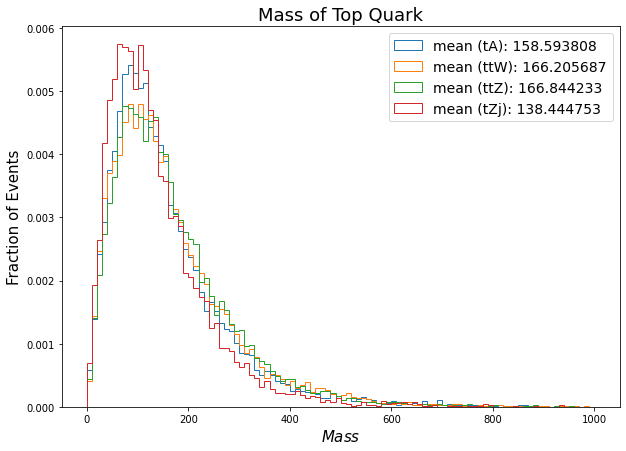

In [8]:
plt.figure(figsize=(10,7)) 
bin = np.linspace(0, 1000, 101)
def MassT(EventSize, ID, Mass):
    mass_t = []
    for i in tqdm(range(EventSize)):
        pid, mass = ID[i], (Mass[i])
        loc = np.where(pid==6)
        mass_t.append(mass[loc])
    return np.concatenate(mass_t)
m = MassT(10000, Att_particle['Particle.PID'], Att_particle['Particle.PT'])
plt.hist(m, density=True, histtype='step', bins=bin, label='mean (tA): %f' %np.mean(m))
m = MassT(10000, ttW_particle['Particle.PID'], ttW_particle['Particle.PT'])
plt.hist(m, density=True, histtype='step', bins=bin, label='mean (ttW): %f' %np.mean(m))
m = MassT(10000, ttZ_particle['Particle.PID'], ttZ_particle['Particle.PT'])
plt.hist(m, density=True, histtype='step', bins=bin, label='mean (ttZ): %f' %np.mean(m))
m = MassT(10000, tZj_particle['Particle.PID'], tZj_particle['Particle.PT'])
plt.hist(m, density=True, histtype='step', bins=bin, label='mean (tZj): %f' %np.mean(m))
plt.legend(fontsize=14)
plt.xlabel(r'$Mass$' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Mass of Top Quark', fontsize=18)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

In [ ]:
plt.figure(figsize=(10,7)) 
bin = np.linspace(-0.5, 15.5, 33)
m1, m2, m3, m4 = ak.num(Att_jet_ak['Jet.Mass']), ak.num(ttW_jet_ak['Jet.Mass']), ak.num(ttZ_jet_ak['Jet.Mass']), ak.num(tZj_jet_ak['Jet.Mass']) 
n = ['tA', 'ttW', 'ttZ', 'tZj']
# create the dataframe; enumerate is used to make column names
df = pd.concat([pd.DataFrame(a, columns=[f'mean: ({n[i-1]}): {round(ak.mean(a), 5)}']) for i, a in enumerate([m1, m2, m3, m4], 1)], axis=1)

# plot the data
df.plot.hist(stacked=False, histtype='step', bins=bin, density=True, figsize=(8, 6))

plt.legend(fontsize=14)
plt.xlabel(r'$N_{jets}$' , fontsize=15) 
plt.ylabel("Fraction of Jets", fontsize=15) 
plt.title('Number of jets', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

In [ ]:
# Min delta R between b-jets
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
n = np.diff(bin)
def f(deltaeta, deltaphi):
    return np.sqrt(deltaeta**2 + deltaphi**2)

def MinRbb(EventSize, BTag, JetEta, JetPhi):
    deltaR = []
    for i in tqdm(range(EventSize)):
        bjet = JetEta[i] * BTag[i]
        bjet_eta = bjet[ak.where(bjet)]
        bjet = JetPhi[i] * BTag[i]
        bjet_phi = bjet[ak.where(bjet)]

        if len(bjet_phi) > 1:
            m = bjet_eta - bjet_eta[:, np.newaxis]
            bjet_eta = m[np.triu_indices(len(m[0]), k = 1)]
            m = bjet_phi - bjet_phi[:, np.newaxis]
            bjet_phi = np.abs(m[np.triu_indices(len(m[0]), k = 1)])
            bjet_phi = np.array([2*np.pi-i if i > np.pi else i for i in bjet_phi])

            deltaR.append(np.min(f(bjet_eta, bjet_phi)))
        else: 
            continue
    return deltaR
deltaR = MinRbb(10000, Att_jet_ak['Jet.BTag'], Att_jet_ak['Jet.Eta'], Att_jet_ak['Jet.Phi'])
plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (tA): %f' %np.mean(deltaR))

deltaR = MinRbb(10000, ttW_jet_ak['Jet.BTag'], ttW_jet_ak['Jet.Eta'], ttW_jet_ak['Jet.Phi'])        
plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (ttW): %f' %np.mean(deltaR))

deltaR = MinRbb(10000, ttZ_jet_ak['Jet.BTag'], ttZ_jet_ak['Jet.Eta'], ttZ_jet_ak['Jet.Phi'])      
plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (ttZ): %f' %np.mean(deltaR))

deltaR = MinRbb(10000, tZj_jet_ak['Jet.BTag'], tZj_jet_ak['Jet.Eta'], tZj_jet_ak['Jet.Phi'])   
plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (tZj): %f' %np.mean(deltaR))

plt.xlabel(r'Δ$R_{bb}^{min}$', fontsize=15)
plt.ylabel('Fraction of Events (more than 2 b-jets)', fontsize=15)
plt.title('Minimum \u0394R between all pairs of b-jets', fontsize=18)
plt.legend()
plt.show()

In [ ]:
# Ht
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 2500, 101)
m = np.diff(bin)
n, bins, patches = plt.hist(ak.flatten(Att_HT['ScalarHT.HT']), histtype='step', density=True, bins=bin, label='mean (tA): %f' %ak.mean(Att_HT['ScalarHT.HT']))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
plt.hist(ak.flatten(ttW_HT['ScalarHT.HT']), histtype='step', density=True, bins=bin, label='mean (ttW): %f' %ak.mean(ttW_HT['ScalarHT.HT']))
plt.hist(ak.flatten(ttZ_HT['ScalarHT.HT']), histtype='step', density=True, bins=bin, label='mean (ttZ): %f' %ak.mean(ttZ_HT['ScalarHT.HT']))
plt.hist(ak.flatten(tZj_HT['ScalarHT.HT']), histtype='step', density=True, bins=bin, label='mean (tZj): %f' %ak.mean(tZj_HT['ScalarHT.HT']))
plt.v
plt.xlabel(r'$H_{T}^{all}$ (GeV)', fontsize=15)
plt.ylabel('Fraction of Events', fontsize=15)
plt.title('Scalar Sum of all jet and lepton transverse momenta', fontsize=18)
plt.legend(fontsize=14)
plt.show()

100%|██████████| 10000/10000 [02:24<00:00, 69.38it/s]


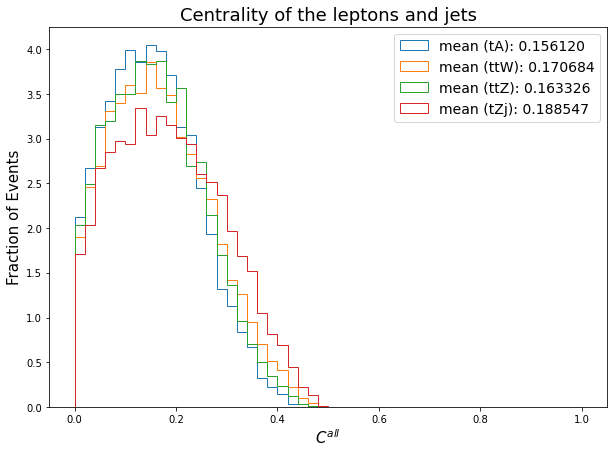

In [12]:
def jet_energy(m, pt, phi, eta):
    return np.sqrt((pt/np.cos(phi))**2 + (pt/np.sin(phi))**2 + (pt/np.sinh(eta))**2 + m**2)
def ele_energy(pt, phi, eta):
    return np.sqrt((pt/np.cos(phi))**2 + (pt/np.sin(phi))**2 + (pt/np.sinh(eta))**2 + (0.511*1e-3)**2)
def muon_energy(pt, phi, eta):
    return np.sqrt((pt/np.cos(phi))**2 + (pt/np.sin(phi))**2 + (pt/np.sinh(eta))**2 + (106*1e-3)**2)

plt.figure(figsize=(10, 7))
bin = np.linspace(0, 1, 51)
n = np.diff(bin)

def Cen(EventSize, JetMass, JetPt, JetPhi, JetEta, ElePt, ElePhi, EleEta, MuonPt, MuonPhi, MuonEta):
    cen = []
    for i in tqdm(range(EventSize)):
        jet_mass, jet_pt, jet_phi, jet_eta = JetMass[i], JetPt[i], JetPhi[i], JetEta[i]
        if len(ElePt[i]) == 0 and len(MuonPt[i]) != 0:
            lep_pt, lep_phi, lep_eta = MuonPt[i], MuonPhi[i], MuonEta[i]
            lep_en = muon_energy(lep_pt, lep_phi, lep_eta)
        elif len(ElePt[i]) != 0 and len(MuonPt[i]) == 0:
            lep_pt, lep_phi, lep_eta = ElePt[i], ElePhi[i], EleEta[i]
            lep_en = ele_energy(lep_pt, lep_phi, lep_eta)
        else: 
            lep_pt, lep_phi = [], []
            lep_en = []
        cen.append((np.sum(jet_pt)+np.sum(lep_pt))/(np.sum(jet_energy(jet_mass, jet_pt, jet_phi, jet_eta))+np.sum(lep_en)))
    return cen
        
m1 = Cen(10000, Att_jet_ak['Jet.Mass'], Att_jet_ak['Jet.PT'], Att_jet_ak['Jet.Phi'], Att_jet_ak['Jet.Eta'], Att_electron['Electron.PT'], 
        Att_electron['Electron.Phi'], Att_electron['Electron.Eta'], Att_muon['Muon.PT'], Att_muon['Muon.Phi'], Att_muon['Muon.Eta'])

m2 = Cen(10000, ttW_jet_ak['Jet.Mass'], ttW_jet_ak['Jet.PT'], ttW_jet_ak['Jet.Phi'], ttW_jet_ak['Jet.Eta'], ttW_electron['Electron.PT'], 
        ttW_electron['Electron.Phi'], ttW_electron['Electron.Eta'], ttW_muon['Muon.PT'], ttW_muon['Muon.Phi'], ttW_muon['Muon.Eta'])

m3 = Cen(10000, ttZ_jet_ak['Jet.Mass'], ttZ_jet_ak['Jet.PT'], ttZ_jet_ak['Jet.Phi'], ttZ_jet_ak['Jet.Eta'], ttZ_electron['Electron.PT'], 
        ttZ_electron['Electron.Phi'], ttZ_electron['Electron.Eta'], ttZ_muon['Muon.PT'], ttZ_muon['Muon.Phi'], ttZ_muon['Muon.Eta'])

m4 = Cen(10000, tZj_jet_ak['Jet.Mass'], tZj_jet_ak['Jet.PT'], tZj_jet_ak['Jet.Phi'], tZj_jet_ak['Jet.Eta'], tZj_electron['Electron.PT'], 
        tZj_electron['Electron.Phi'], tZj_electron['Electron.Eta'], tZj_muon['Muon.PT'], tZj_muon['Muon.Phi'], tZj_muon['Muon.Eta'])

plt.hist(m1, histtype='step', density=True, bins=bin, label='mean (tA): %f' %np.mean(m))
plt.hist(m2, histtype='step', density=True, bins=bin, label='mean (ttW): %f' %np.mean(m))
plt.hist(m3, histtype='step', density=True, bins=bin, label='mean (ttZ): %f' %np.mean(m))
plt.hist(m4, histtype='step', density=True, bins=bin, label='mean (tZj): %f' %np.mean(m))

plt.xlabel(r'$C^{all}$', fontsize=15)
plt.ylabel('Fraction of Events', fontsize=15)
plt.title('Centrality of the leptons and jets', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [ ]:
def jet_energy(m, pt, phi, eta):
    return np.sqrt((pt/np.cos(phi))**2 + (pt/np.sin(phi))**2 + (pt/np.sinh(eta))**2 + m**2)
def ele_energy(pt, phi, eta):
    return np.sqrt((pt/np.cos(phi))**2 + (pt/np.sin(phi))**2 + (pt/np.sinh(eta))**2 + (0.511*1e-3)**2)
def muon_energy(pt, phi, eta):
    return np.sqrt((pt/np.cos(phi))**2 + (pt/np.sin(phi))**2 + (pt/np.sinh(eta))**2 + (106*1e-3)**2)

plt.figure(figsize=(10, 7))

def Cen(EventSize, JetMass, JetPt, JetPhi, JetEta, ElePt, ElePhi, EleEta, MuonPt, MuonPhi, MuonEta):
    pt, en = [], []
    for i in tqdm(range(EventSize)):
        jet_mass, jet_pt, jet_phi, jet_eta = JetMass[i], JetPt[i], JetPhi[i], JetEta[i]
        if len(ElePt[i]) == 0 and len(MuonPt[i]) != 0:
            lep_pt, lep_phi, lep_eta = MuonPt[i], MuonPhi[i], MuonEta[i]
            lep_en = muon_energy(lep_pt, lep_phi, lep_eta)
        elif len(ElePt[i]) != 0 and len(MuonPt[i]) == 0:
            lep_pt, lep_phi, lep_eta = ElePt[i], ElePhi[i], EleEta[i]
            lep_en = ele_energy(lep_pt, lep_phi, lep_eta)
        else: 
            lep_pt, lep_phi = [], []
            lep_en = []
        pt.append(np.sum(jet_pt)+np.sum(lep_pt))
        en.append(np.sum(jet_energy(jet_mass, jet_pt, jet_phi, jet_eta))+np.sum(lep_en))
    return pt, en

pt1, en1 = Cen(10000, Att_jet_ak['Jet.Mass'], Att_jet_ak['Jet.PT'], Att_jet_ak['Jet.Phi'], Att_jet_ak['Jet.Eta'], Att_electron['Electron.PT'], 
               Att_electron['Electron.Phi'], Att_electron['Electron.Eta'], Att_muon['Muon.PT'], Att_muon['Muon.Phi'], Att_muon['Muon.Eta'])

pt2, en2 = Cen(10000, ttW_jet_ak['Jet.Mass'], ttW_jet_ak['Jet.PT'], ttW_jet_ak['Jet.Phi'], ttW_jet_ak['Jet.Eta'], ttW_electron['Electron.PT'], 
               ttW_electron['Electron.Phi'], ttW_electron['Electron.Eta'], ttW_muon['Muon.PT'], ttW_muon['Muon.Phi'], ttW_muon['Muon.Eta'])

pt3, en3 = Cen(10000, ttZ_jet_ak['Jet.Mass'], ttZ_jet_ak['Jet.PT'], ttZ_jet_ak['Jet.Phi'], ttZ_jet_ak['Jet.Eta'], ttZ_electron['Electron.PT'], 
               ttZ_electron['Electron.Phi'], ttZ_electron['Electron.Eta'], ttZ_muon['Muon.PT'], ttZ_muon['Muon.Phi'], ttZ_muon['Muon.Eta'])

pt4, en4 = Cen(10000, tZj_jet_ak['Jet.Mass'], tZj_jet_ak['Jet.PT'], tZj_jet_ak['Jet.Phi'], tZj_jet_ak['Jet.Eta'], tZj_electron['Electron.PT'], 
               tZj_electron['Electron.Phi'], tZj_electron['Electron.Eta'], tZj_muon['Muon.PT'], tZj_muon['Muon.Phi'], tZj_muon['Muon.Eta'])

plt.scatter(pt1, en1, marker='.', label='tA')
plt.scatter(pt2, en2, marker='.', label='ttW')
plt.scatter(pt3, en3, marker='.', label='ttZ')
plt.scatter(pt4, en4, marker='.', label='tZj')
x = np.arange(0, 4000)
y = x
plt.plot(x, y, color='grey', linestyle='--', )

plt.xlabel(r'$∑p_{Ti}$', fontsize=15)
plt.ylabel(r'$∑_{i} E_{i}$', fontsize=15)
plt.ylim(0, 5000)
plt.title('Centrality of the leptons and jets (2d correlation plots)', fontsize=18)
plt.legend(fontsize=14)
plt.show()

 91%|█████████ | 9080/10000 [18:54<14:33,  1.05it/s]t]

In [16]:
x = np.arange(0, 10)

[[155, 108, 49.7, 49.6], [89.3, 88.1, 45.2, ... [55.8, 43.3], [143, 121, 70.8, 36.6]]
411029.66


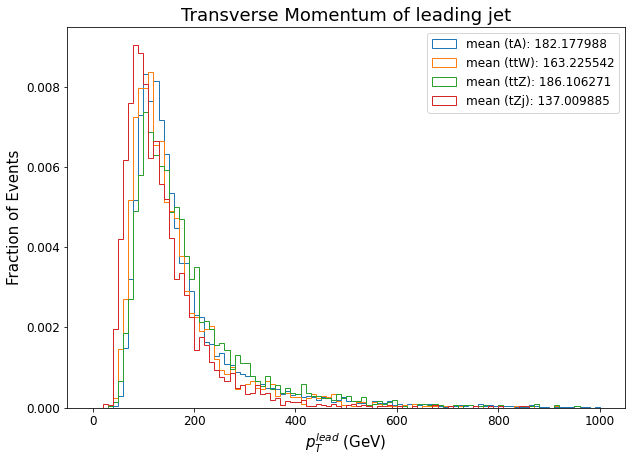

In [75]:
# Transverse Momentum of leading jet
plt.figure(figsize=(10,7)) 
bin = np.linspace(0, 1000, 101)
m = np.diff(bin)
m1 = ak.max(Att_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
plt.hist(m1, bins=bin, histtype='step', density=True, label='mean (tA): %f' %(ak.mean(m1)))
m1 = ak.max(ttW_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
plt.hist(m1, bins=bin, histtype='step', density=True, label='mean (ttW): %f' %(ak.mean(m1)))
m1 = ak.max(ttZ_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
plt.hist(m1, bins=bin, histtype='step', density=True, label='mean (ttZ): %f' %(ak.mean(m1)))
m1 = ak.max(tZj_jet_ak['Jet.PT'], axis=-1, mask_identity=False)
print(tZj_jet_ak['Jet.PT'])
print(np.sum(m1))
plt.hist(m1, bins=bin, histtype='step', density=True, label='mean (tZj): %f' %(ak.mean(m1)))

plt.legend(fontsize=12)
plt.xlabel(r'$p_{T}^{lead}$ (GeV)' , fontsize=15) 
plt.ylabel("Fraction of Events", fontsize=15) 
plt.title('Transverse Momentum of leading jet', fontsize=18)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()

100%|██████████| 10000/10000 [00:07<00:00, 1357.35it/s]


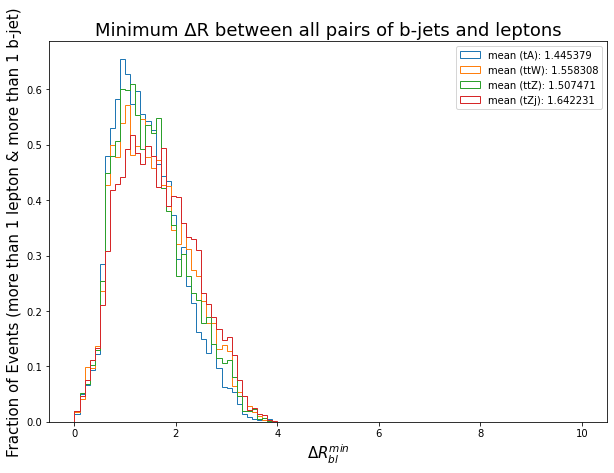

In [24]:
# Minimum delta R between b-jets and leptons
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
n = np.diff(bin)
def f(deltaeta, deltaphi):
    return np.sqrt(deltaeta**2 + deltaphi**2)

def MinR_bl(EventSize, JetEta, JetPhi, EleEta, ElePhi, MuonEta, MuonPhi):
    deltaR = []
    for i in tqdm(range(EventSize)):
        jet_eta, jet_phi = JetEta[i], JetPhi[i]
        if len(EleEta[i]) == 0 and len(MuonEta[i]) != 0:
            lep_eta, lep_phi = MuonEta[i], MuonPhi[i]
        elif len(EleEta[i]) != 0 and len(MuonEta[i]) == 0:
            lep_eta, lep_phi = EleEta[i], ElePhi[i]
        else: 
            lep_eta, lep_phi = [], []

        if len(jet_phi) != 0 and len(lep_phi) != 0:

            deltaeta = np.array([i-j for i in jet_eta for j in lep_eta])
            deltaphi = np.abs([i-j for i in jet_phi for j in lep_phi])
            deltaphi = np.array([2*np.pi-i if i > np.pi else i for i in deltaphi])
            deltaR.append(min(f(deltaeta, deltaphi)))
        else: 
            continue
            
    return deltaR
deltaR = MinR_bl(10000, Att_jet_ak['Jet.Eta']*Att_jet_ak['Jet.BTag'], Att_jet_ak['Jet.Phi']*Att_jet_ak['Jet.BTag'], Att_electron['Electron.Eta'], 
                 Att_electron['Electron.Phi'], Att_muon['Muon.Eta'], Att_muon['Muon.Phi'])

plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (tA): %f' %np.mean(deltaR))

deltaR = MinR_bl(10000, ttW_jet_ak['Jet.Eta']*ttW_jet_ak['Jet.BTag'], ttW_jet_ak['Jet.Phi']*ttW_jet_ak['Jet.BTag'], ttW_electron['Electron.Eta'],
                 ttW_electron['Electron.Phi'], ttW_muon['Muon.Eta'], ttW_muon['Muon.Phi'])

plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (ttW): %f' %np.mean(deltaR))

deltaR = MinR_bl(10000, ttZ_jet_ak['Jet.Eta']*ttZ_jet_ak['Jet.BTag'], ttZ_jet_ak['Jet.Phi']*ttZ_jet_ak['Jet.BTag'], ttZ_electron['Electron.Eta'],
                 ttZ_electron['Electron.Phi'], ttZ_muon['Muon.Eta'], ttZ_muon['Muon.Phi'])

plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (ttZ): %f' %np.mean(deltaR))

deltaR = MinR_bl(10000, tZj_jet_ak['Jet.Eta']*tZj_jet_ak['Jet.BTag'], tZj_jet_ak['Jet.Phi']*tZj_jet_ak['Jet.BTag'], tZj_electron['Electron.Eta'],
                 tZj_electron['Electron.Phi'], tZj_muon['Muon.Eta'], tZj_muon['Muon.Phi'])

plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (tZj): %f' %np.mean(deltaR))



plt.xlabel(r'$ΔR_{bl}^{min}$', fontsize=15)
plt.ylabel('Fraction of Events (more than 1 lepton & more than 1 b-jet)', fontsize=15)
plt.title('Minimum \u0394R between all pairs of b-jets and leptons', fontsize=18)
plt.legend()
plt.show()

100%|██████████| 10000/10000 [02:00<00:00, 82.82it/s]


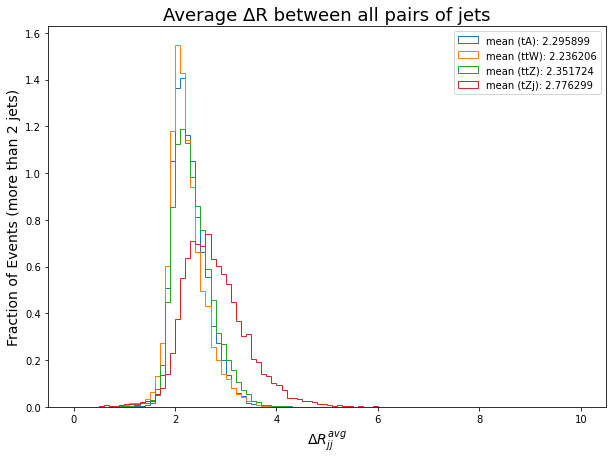

In [10]:
# Average delta R between all jets
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 10, 101)
n = np.diff(bin)
def f(deltaeta, deltaphi):
    return np.sqrt(deltaeta**2 + deltaphi**2)
deltaR = []


for i in tqdm(range(len(Att_jet_ak['Jet.Eta']))):

    jet_eta = Att_jet_ak['Jet.Eta'][i]
    jet_phi = Att_jet_ak['Jet.Phi'][i]

    if len(jet_phi) != 1 and len(jet_phi) != 0:
        m = jet_eta - jet_eta[:, np.newaxis]
        jet_eta = m[np.triu_indices(len(m[0]), k = 1)]
        m = jet_phi - jet_phi[:, np.newaxis]
        jet_phi = np.abs(m[np.triu_indices(len(m[0]), k = 1)])
        jet_phi = np.array([2*np.pi-i if i > np.pi else i for i in jet_phi])

        deltaR.append(np.mean(f(jet_eta, jet_phi)))
    else: 
        continue

plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (tA): %f' %np.mean(deltaR))

deltaR = []

for i in tqdm(range(len(ttW_jet_ak['Jet.Eta']))):

    jet_eta = ttW_jet_ak['Jet.Eta'][i]
    jet_phi = ttW_jet_ak['Jet.Phi'][i]

    if len(jet_phi) != 1 and len(jet_phi) != 0:
        m = jet_eta - jet_eta[:, np.newaxis]
        jet_eta = m[np.triu_indices(len(m[0]), k = 1)]
        m = jet_phi - jet_phi[:, np.newaxis]
        jet_phi = np.abs(m[np.triu_indices(len(m[0]), k = 1)])
        jet_phi = np.array([2*np.pi-i if i > np.pi else i for i in jet_phi])

        deltaR.append(np.mean(f(jet_eta, jet_phi)))
    else: 
        continue

        
plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (ttW): %f' %np.mean(deltaR))

deltaR = []

for i in tqdm(range(len(ttZ_jet_ak['Jet.Eta']))):

    jet_eta = ttZ_jet_ak['Jet.Eta'][i]
    jet_phi = ttZ_jet_ak['Jet.Phi'][i]

    if len(jet_phi) != 1 and len(jet_phi) != 0:
        m = jet_eta - jet_eta[:, np.newaxis]
        jet_eta = m[np.triu_indices(len(m[0]), k = 1)]
        m = jet_phi - jet_phi[:, np.newaxis]
        jet_phi = np.abs(m[np.triu_indices(len(m[0]), k = 1)])
        jet_phi = np.array([2*np.pi-i if i > np.pi else i for i in jet_phi])

        deltaR.append(np.mean(f(jet_eta, jet_phi)))
    else: 
        continue

        
plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (ttZ): %f' %np.mean(deltaR))

deltaR = []

for i in tqdm(range(len(tZj_jet_ak['Jet.Eta']))):

    jet_eta = tZj_jet_ak['Jet.Eta'][i]
    jet_phi = tZj_jet_ak['Jet.Phi'][i]

    if len(jet_phi) != 1 and len(jet_phi) != 0:
        m = jet_eta - jet_eta[:, np.newaxis]
        jet_eta = m[np.triu_indices(len(m[0]), k = 1)]
        m = jet_phi - jet_phi[:, np.newaxis]
        jet_phi = np.abs(m[np.triu_indices(len(m[0]), k = 1)])
        jet_phi = np.array([2*np.pi-i if i > np.pi else i for i in jet_phi])

        deltaR.append(np.mean(f(jet_eta, jet_phi)))
    else: 
        continue

        
plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (tZj): %f' %np.mean(deltaR))
plt.xlabel(r'$ΔR_{jj}^{avg}$', fontsize=14)
plt.ylabel('Fraction of Events (more than 2 jets)', fontsize=14)
plt.title('Average \u0394R between all pairs of jets', fontsize=18)
plt.legend()
plt.show()

100%|██████████| 10000/10000 [00:08<00:00, 1196.81it/s]


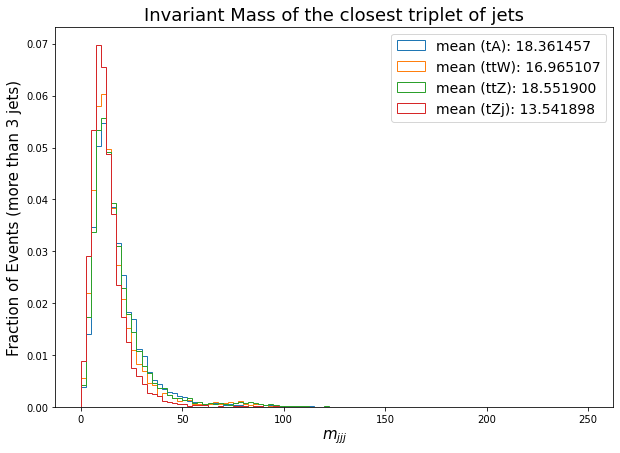

In [9]:
# Invariant Mass of the closest triplet jets
def deltaR_ijk(deltaeta, deltaphi):
    return np.sqrt(np.sum(deltaeta**2)+np.sum(deltaphi**2))

plt.figure(figsize=(10, 7))
bin = np.linspace(0, 250, 101)
n = np.diff(bin)


def MassTriJet(EventSize, JetMass, JetEta, JetPhi):
    deltaR = []
    for i in tqdm(range(EventSize)):
        jet_mass, jet_eta, jet_phi = JetMass[i], JetEta[i], JetPhi[i]
        
        if len(jet_phi) >= 3:
            m = []
            jet = zip(jet_mass, jet_eta, jet_phi)
            AllCombination = list(itertools.combinations(jet, 3))
            for j in range(len(AllCombination)):
                eta, phi = AllCombination[j][1], AllCombination[j][2]
                deltaeta = np.array([i-j for i in eta[:-1] for j in eta[1:] if i != j])
                deltaphi = np.abs([i-j for i in phi[:-1] for j in phi[1:] if i != j])
                deltaphi = np.array([2*np.pi-i if i > np.pi else i for i in deltaphi])
                m.append(deltaR_ijk(deltaeta, deltaphi))
            MinIndex = m.index(min(m))
            deltaR.append(sum(AllCombination[MinIndex][0]))
        else: 
            continue
    return deltaR

deltaR = MassTriJet(10000, Att_jet_ak['Jet.Mass'], Att_jet_ak['Jet.Eta'], Att_jet_ak['Jet.Phi'])
plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (tA): %f' %np.mean(deltaR))

deltaR = MassTriJet(10000, ttW_jet_ak['Jet.Mass'], ttW_jet_ak['Jet.Eta'], ttW_jet_ak['Jet.Phi'])
plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (ttW): %f' %np.mean(deltaR))

deltaR = MassTriJet(10000, ttZ_jet_ak['Jet.Mass'], ttZ_jet_ak['Jet.Eta'], ttZ_jet_ak['Jet.Phi'])
plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (ttZ): %f' %np.mean(deltaR))

deltaR = MassTriJet(10000, tZj_jet_ak['Jet.Mass'], tZj_jet_ak['Jet.Eta'], tZj_jet_ak['Jet.Phi'])
plt.hist(deltaR, bins=bin, histtype='step', density=True, label='mean (tZj): %f' %np.mean(deltaR))
plt.xlabel(r'$m_{jjj}$', fontsize=15)
plt.ylabel('Fraction of Events (more than 3 jets)', fontsize=15)
plt.title('Invariant Mass of the closest triplet of jets', fontsize=18)
plt.legend(fontsize=14)
plt.show()


In [ ]:
plt.figure(figsize=(10, 7))
bin = np.linspace(0, 700, 101)
m = np.diff(bin)
n, bins, patches = plt.hist(ak.flatten(Att_Emiss['MissingET.MET']), histtype='step', density=True, bins=bin, label='mean (tA): %f' %ak.mean(Att_Emiss['MissingET.MET']))
print("Area below the integral: ", np.sum(n * np.diff(bins)))
plt.hist(ak.flatten(ttW_Emiss['MissingET.MET']), histtype='step', density=True, bins=bin, label='mean (ttW): %f' %ak.mean(ttW_Emiss['MissingET.MET']))
plt.hist(ak.flatten(ttZ_Emiss['MissingET.MET']), histtype='step', density=True, bins=bin, label='mean (ttZ): %f' %ak.mean(ttZ_Emiss['MissingET.MET']))
plt.hist(ak.flatten(tZj_Emiss['MissingET.MET']), histtype='step', density=True, bins=bin, label='mean (tZj): %f' %ak.mean(tZj_Emiss['MissingET.MET']))
plt.xlabel(r'$E_{T}^{miss}$', fontsize=15)
plt.ylabel('Fraction of Events', fontsize=15)
plt.title('Missing Transverse Momentum', fontsize=18)
plt.legend(fontsize=14)
plt.show()